In [94]:
!pip install split-folders

In [95]:
import splitfolders

In [96]:
splitfolders.ratio("/content/drive/MyDrive/Utensils-final/Raw", output="output", seed=1337, ratio=(.9, .1), group_prefix=None)

Copying files: 907 files [00:19, 45.39 files/s] 


In [97]:
import matplotlib.pyplot as plt
import matplotlib.image as mping

In [98]:
img = mping.imread("Fork.jpg")

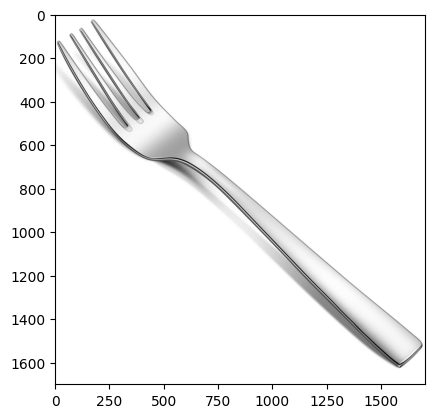

In [99]:
plt.imshow(img)

In [100]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [101]:
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2)

In [102]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [103]:
train = train_datagen.flow_from_directory("output/train/",target_size=(224,224),seed=42,batch_size=32,class_mode="categorical")

Found 807 images belonging to 20 classes.


In [104]:
test = train_datagen.flow_from_directory("output/val/",target_size=(224,224),seed=42,batch_size=32,class_mode="categorical")

Found 100 images belonging to 20 classes.


In [105]:
from tensorflow.keras.preprocessing import image

In [106]:
test_image = image.load_img('Fork.jpg', target_size=(224,224))

In [107]:
test_image = image.img_to_array(test_image)

In [108]:
test_image = tf.expand_dims(test_image,axis=0)

In [109]:
test_image = test_image/255.

In [110]:
test_image.shape

TensorShape([1, 224, 224, 3])

In [111]:
import tensorflow_hub as hub

In [112]:
import tensorflow_hub as hub

m = tf.keras.Sequential([
hub.KerasLayer("https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"),
tf.keras.layers.Dense(20, activation='softmax')
])

In [115]:
m.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [116]:
history = m.fit(train,epochs=5,steps_per_epoch=len(train),validation_data=test,validation_steps=len(test))

Epoch 1/5
26/26 [==============================] - 63s 2s/step - loss: 2.3660 - accuracy: 0.3296 - val_loss: 1.9202 - val_accuracy: 0.4300
Epoch 2/5
26/26 [==============================] - 50s 2s/step - loss: 1.4708 - accuracy: 0.6419 - val_loss: 1.4337 - val_accuracy: 0.6100
Epoch 3/5
26/26 [==============================] - 50s 2s/step - loss: 1.0620 - accuracy: 0.7732 - val_loss: 1.1486 - val_accuracy: 0.6700
Epoch 4/5
26/26 [==============================] - 54s 2s/step - loss: 0.8469 - accuracy: 0.8228 - val_loss: 1.1108 - val_accuracy: 0.6800
Epoch 5/5
26/26 [==============================] - 49s 2s/step - loss: 0.6979 - accuracy: 0.8476 - val_loss: 0.9090 - val_accuracy: 0.7500


In [117]:
classes=train.class_indices

In [118]:
classes=list(classes.keys())

In [119]:
m.predict(test_image)

1/1 [==============================] - 1s 1s/step


array([[0.00306713, 0.04043384, 0.00533145, 0.01094196, 0.32053077,
        0.01205216, 0.20742872, 0.00506183, 0.03777151, 0.01124516,
        0.01428659, 0.00523884, 0.00758633, 0.10070609, 0.02063161,
        0.12933467, 0.00181775, 0.01014144, 0.02199306, 0.03439908]],
      dtype=float32)

In [120]:
classes[tf.argmax(m.predict(test_image),axis=1).numpy()[0]]

1/1 [==============================] - 0s 27ms/step


'DINNER_FORK'

In [121]:
import pandas as pd

<Axes: >

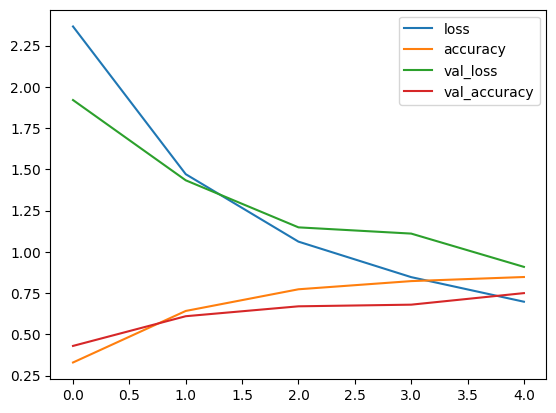

In [122]:
pd.DataFrame(history.history).plot()


In [123]:
m.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              4049564   
                                                                 
 dense_8 (Dense)             (None, 20)                25620     
                                                                 
Total params: 4075184 (15.55 MB)
Trainable params: 25620 (100.08 KB)
Non-trainable params: 4049564 (15.45 MB)
_________________________________________________________________
